# Analyzing Ford GoBike System Data
#####  by HUI-YING LU

## Introduction
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201904-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         50305  2019-04-30 22:33:55.1550  2019-05-01 12:32:20.4540   
1         53725  2019-04-30 20:43:41.6320  2019-05-01 11:39:06.9170   
2         78072  2019-04-30 10:32:46.4890  2019-05-01 08:13:58.9750   
3         78969  2019-04-30 10:00:51.5500  2019-05-01 07:57:01.2620   
4          1128  2019-04-30 23:59:04.7390  2019-05-01 00:17:53.0910   

   start_station_id                                 start_station_name  \
0             368.0                               Myrtle St at Polk St   
1             246.0                              Berkeley Civic Center   
2              64.0                               5th St at Brannan St   
3              67.0  San Francisco Caltrain Station 2  (Townsend St...   
4             124.0                              19th St at Florida St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.785434              -122.419622           324.0   
1               37.869060              -122.270556           241.0   
2               37.776754              -122.399018            64.0   
3               37.776639              -122.395526            89.0   
4               37.760447              -122.410807             5.0   

                               end_station_name  end_station_latitude  \
0           Union Square (Powell St at Post St)             37.788300   
1                            Ashby BART Station             37.852477   
2                          5th St at Brannan St             37.776754   
3                    Division St at Potrero Ave             37.769218   
4  Powell St BART Station (Market St at 5th St)             37.783899   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.408531     2749  Subscriber             1989.0   
1            -122.270213     2608    Customer                NaN   
2            -122.399018      258  Subscriber             1993.0   
3            -122.407646     1974  Subscriber             1972.0   
4            -122.408445      877  Subscriber             1973.0   

  member_gender bike_share_for_all_trip  
0        Female                      No  
1           NaN                      No  
2          Male                      No  
3          Male                      No  
4          Male                      No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


In [4]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  239111.000000     239047.000000           239111.000000   
mean      802.671199        141.836538               37.769536   
std      1990.006091        116.289776                0.127698   
min        61.000000          3.000000                0.000000   
25%       349.000000         47.000000               37.770083   
50%       558.000000        104.000000               37.780760   
75%       876.000000        240.000000               37.797280   
max     86114.000000        420.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            239111.000000   239047.000000         239111.000000   
mean               -122.352503      140.838099             37.766996   
std                   0.277088      116.386168              0.343083   
min                -122.453704        3.000000              0.000000   
25%                -122.413004       44.000000             37.770407   
50%                -122.398285      102.000000             37.780955   
75%                -122.291209      239.000000             37.797320   
max                   0.000000      420.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          239111.000000  239111.000000      227912.000000  
mean             -122.343420    3666.956493        1984.863250  
std                 1.068144    2180.717333           9.953144  
min              -122.453704      11.000000        1878.000000  
25%              -122.411738    1720.000000        1980.000000  
50%              -122.397437    3471.000000        1987.000000  
75%              -122.291376    5749.000000        1992.000000  
max                 0.000000    7108.000000        2001.000000

In [5]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id              64
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                64
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [6]:
# Remove rows that does not have gender value
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227912 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               227912 non-null int64
start_time                 227912 non-null object
end_time                   227912 non-null object
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227912 non-null float64
start_station_longitude    227912 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227912 non-null float64
end_station_longitude      227912 non-null float64
bike_id                    227912 non-null int64
user_type                  227912 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    227912 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.6+ MB


In [7]:
df_clean['member_gender'].value_counts()

Male      168140
Female     55498
Other       4274
Name: member_gender, dtype: int64

In [8]:
df_clean['user_type'].value_counts()

Subscriber    198510
Customer       29402
Name: user_type, dtype: int64

In [9]:
# Remove rows that does not have station id
df_clean = df_clean[df_clean['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null object
end_time                   227848 non-null object
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null float64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.6+ MB


In [10]:
df_clean.duplicated().sum()

0

In [11]:
# Change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [12]:
# Extract dayofweek, hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 18 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null float64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
start_time_dayofweek       227848 non-null object
start_time_hour   

In [14]:
df_clean.head()

duration_sec              start_time                end_time  \
0         50305 2019-04-30 22:33:55.155 2019-05-01 12:32:20.454   
2         78072 2019-04-30 10:32:46.489 2019-05-01 08:13:58.975   
3         78969 2019-04-30 10:00:51.550 2019-05-01 07:57:01.262   
4          1128 2019-04-30 23:59:04.739 2019-05-01 00:17:53.091   
5          1388 2019-04-30 23:53:05.982 2019-05-01 00:16:14.313   

   start_station_id                                 start_station_name  \
0             368.0                               Myrtle St at Polk St   
2              64.0                               5th St at Brannan St   
3              67.0  San Francisco Caltrain Station 2  (Townsend St...   
4             124.0                              19th St at Florida St   
5             243.0                        Bancroft Way at College Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.785434              -122.419622           324.0   
2               37.776754              -122.399018            64.0   
3               37.776639              -122.395526            89.0   
4               37.760447              -122.410807             5.0   
5               37.869360              -122.254337           247.0   

                               end_station_name  end_station_latitude  \
0           Union Square (Powell St at Post St)             37.788300   
2                          5th St at Brannan St             37.776754   
3                    Division St at Potrero Ave             37.769218   
4  Powell St BART Station (Market St at 5th St)             37.783899   
5                     Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.408531     2749  Subscriber             1989.0   
2            -122.399018      258  Subscriber             1993.0   
3            -122.407646     1974  Subscriber             1972.0   
4            -122.408445      877  Subscriber             1973.0   
5            -122.265896     3234    Customer             1997.0   

  member_gender bike_share_for_all_trip start_time_dayofweek  start_time_hour  
0        Female                      No                  Tue               22  
2          Male                      No                  Tue               10  
3          Male                      No                  Tue               10  
4          Male                      No                  Tue               23  
5          Male                      No                  Tue               23

In [16]:
df_clean['start_time_dayofweek'].value_counts()

Tue    41856
Mon    39296
Thu    37234
Wed    37222
Fri    33733
Sat    21475
Sun    17032
Name: start_time_dayofweek, dtype: int64

In [17]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 18 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null float64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
start_time_dayofweek       227848 non-null category
start_time_hour 

In [19]:
# Calculate member_age from member_birth_year.
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [20]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 19 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null int32
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
start_time_dayofweek       227848 non-null category
start_time_hour   

In [22]:
df_clean.head()

duration_sec              start_time                end_time  \
0         50305 2019-04-30 22:33:55.155 2019-05-01 12:32:20.454   
2         78072 2019-04-30 10:32:46.489 2019-05-01 08:13:58.975   
3         78969 2019-04-30 10:00:51.550 2019-05-01 07:57:01.262   
4          1128 2019-04-30 23:59:04.739 2019-05-01 00:17:53.091   
5          1388 2019-04-30 23:53:05.982 2019-05-01 00:16:14.313   

   start_station_id                                 start_station_name  \
0             368.0                               Myrtle St at Polk St   
2              64.0                               5th St at Brannan St   
3              67.0  San Francisco Caltrain Station 2  (Townsend St...   
4             124.0                              19th St at Florida St   
5             243.0                        Bancroft Way at College Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.785434              -122.419622           324.0   
2               37.776754              -122.399018            64.0   
3               37.776639              -122.395526            89.0   
4               37.760447              -122.410807             5.0   
5               37.869360              -122.254337           247.0   

                               end_station_name  end_station_latitude  \
0           Union Square (Powell St at Post St)             37.788300   
2                          5th St at Brannan St             37.776754   
3                    Division St at Potrero Ave             37.769218   
4  Powell St BART Station (Market St at 5th St)             37.783899   
5                     Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.408531     2749  Subscriber               1989   
2            -122.399018      258  Subscriber               1993   
3            -122.407646     1974  Subscriber               1972   
4            -122.408445      877  Subscriber               1973   
5            -122.265896     3234    Customer               1997   

  member_gender bike_share_for_all_trip start_time_dayofweek  start_time_hour  \
0        Female                      No                  Tue               22   
2          Male                      No                  Tue               10   
3          Male                      No                  Tue               10   
4          Male                      No                  Tue               23   
5          Male                      No                  Tue               23   

   member_age  
0          30  
2          26  
3          47  
4          46  
5          22

### What is the structure of your dataset?
The dataset has 20000+ bike rides that happen in 2019 in the San Francisco Bay Area. The dataset contains features about:
> - trip duration: how long the trip took in seconds
> - start time/end time: start/end date/time for the bike rides.
> - stations: start/end station, name, geolocation (latitude/longitude)
> - anonymized customer data: gender, birth date and user type
> - rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
> - rental time: hour of the day, weekday
> - customer: age

### What is/are the main feature(s) of interest in your dataset?
I am interested in investigating the duration of cycling time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think the following features may help to support my investigation into the feature (duration) I am interested.
> - start_time - I'll extract dayofweek, hours for further investigation.
> - member_birth_year - we may derive member age and investigate the relationship between member age and cycling durations.
> - member_gender
> - user_type

## Univariate Exploration

**Let's convert duration to minutes instead of using seconds for easier investigations.**

In [23]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 20 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null int32
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
start_time_dayofweek       227848 non-null category
start_time_hour   

In [24]:
df_clean.head()

duration_sec              start_time                end_time  \
0         50305 2019-04-30 22:33:55.155 2019-05-01 12:32:20.454   
2         78072 2019-04-30 10:32:46.489 2019-05-01 08:13:58.975   
3         78969 2019-04-30 10:00:51.550 2019-05-01 07:57:01.262   
4          1128 2019-04-30 23:59:04.739 2019-05-01 00:17:53.091   
5          1388 2019-04-30 23:53:05.982 2019-05-01 00:16:14.313   

   start_station_id                                 start_station_name  \
0             368.0                               Myrtle St at Polk St   
2              64.0                               5th St at Brannan St   
3              67.0  San Francisco Caltrain Station 2  (Townsend St...   
4             124.0                              19th St at Florida St   
5             243.0                        Bancroft Way at College Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.785434              -122.419622           324.0   
2               37.776754              -122.399018            64.0   
3               37.776639              -122.395526            89.0   
4               37.760447              -122.410807             5.0   
5               37.869360              -122.254337           247.0   

                               end_station_name  end_station_latitude  \
0           Union Square (Powell St at Post St)             37.788300   
2                          5th St at Brannan St             37.776754   
3                    Division St at Potrero Ave             37.769218   
4  Powell St BART Station (Market St at 5th St)             37.783899   
5                     Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.408531     2749  Subscriber               1989   
2            -122.399018      258  Subscriber               1993   
3            -122.407646     1974  Subscriber               1972   
4            -122.408445      877  Subscriber               1973   
5            -122.265896     3234    Customer               1997   

  member_gender bike_share_for_all_trip start_time_dayofweek  start_time_hour  \
0        Female                      No                  Tue               22   
2          Male                      No                  Tue               10   
3          Male                      No                  Tue               10   
4          Male                      No                  Tue               23   
5          Male                      No                  Tue               23   

   member_age  duration_min  
0          30    838.416667  
2          26   1301.200000  
3          47   1316.150000  
4          46     18.800000  
5          22     23.133333

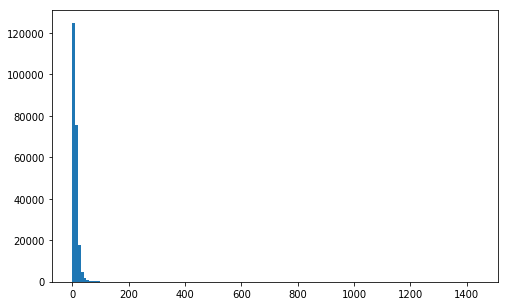

In [24]:
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df_clean, x = 'duration_min', bins=bins);

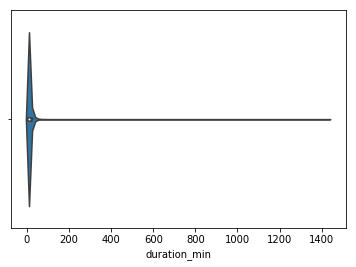

In [25]:
sb.violinplot(data = df_clean, x = 'duration_min');

**It's seems that most data are below 50. Let's find out the distribution.**

In [26]:
df_clean['duration_min'].describe()

count    227848.000000
mean         12.861290
std          30.366500
min           1.016667
25%           5.766667
50%           9.216667
75%          14.416667
max        1435.233333
Name: duration_min, dtype: float64

**The data is not distributed normally. Let's calculate the IQR:** 
> - IQR = Q3 - Q1 = 14.416 - 5.766
> - Upper Wisker Bound = (1.5 * IQR) + Q3 = 12.975 + 14.416 = 27.391

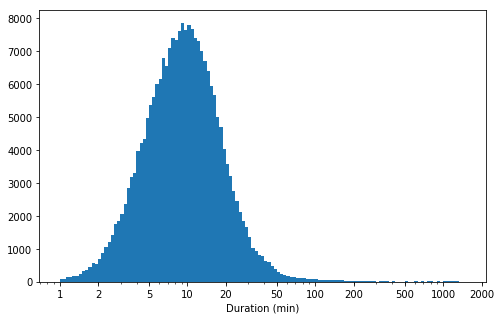

In [29]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)');

**The distribution now looks closer to normal distribution. But, there is a long tail still. Let's remove the long tail.**

In [25]:
# Leave records with duration_min < 100 min
df_clean = df_clean[df_clean['duration_min'] <= 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226804 entries, 4 to 239110
Data columns (total 20 columns):
duration_sec               226804 non-null int64
start_time                 226804 non-null datetime64[ns]
end_time                   226804 non-null datetime64[ns]
start_station_id           226804 non-null float64
start_station_name         226804 non-null object
start_station_latitude     226804 non-null float64
start_station_longitude    226804 non-null float64
end_station_id             226804 non-null float64
end_station_name           226804 non-null object
end_station_latitude       226804 non-null float64
end_station_longitude      226804 non-null float64
bike_id                    226804 non-null int64
user_type                  226804 non-null object
member_birth_year          226804 non-null int32
member_gender              226804 non-null object
bike_share_for_all_trip    226804 non-null object
start_time_dayofweek       226804 non-null category
start_time_hour   

**Let's look at member age now.**

In [31]:
df_clean['member_age'].describe()

count    226804.000000
mean         34.137008
std           9.954496
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

**Note: max age is 141! Not usual.**

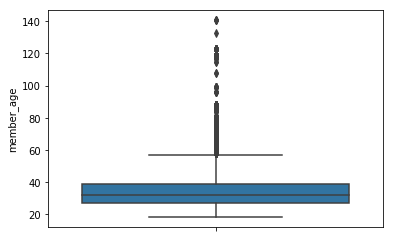

In [32]:
sb.boxplot(data = df_clean, y = 'member_age');

**The data is not distributed evenly. Let's calculate the IQR:** 
> - IQR = Q3 - Q1 = 39.0 - 27.0 = 12.0
> - Upper Wisker Bound = (1.5 * IQR) + Q3 = 18.0 + 39.0  = 57.0

In [26]:
# Let's remove outliers. Only keep records with member_age below 60.
df_clean = df_clean[df_clean['member_age'] <= 60]

In [27]:
df_clean.head()

duration_sec              start_time                end_time  \
4          1128 2019-04-30 23:59:04.739 2019-05-01 00:17:53.091   
5          1388 2019-04-30 23:53:05.982 2019-05-01 00:16:14.313   
6           920 2019-04-30 23:57:56.340 2019-05-01 00:13:16.454   
7           725 2019-04-30 23:56:11.219 2019-05-01 00:08:16.915   
8           488 2019-04-30 23:59:00.660 2019-05-01 00:07:08.975   

   start_station_id                                 start_station_name  \
4             124.0                              19th St at Florida St   
5             243.0                        Bancroft Way at College Ave   
6             202.0                            Washington St at 8th St   
7              44.0  Civic Center/UN Plaza BART Station (Market St ...   
8              21.0   Montgomery St BART Station (Market St at 2nd St)   

   start_station_latitude  start_station_longitude  end_station_id  \
4               37.760447              -122.410807             5.0   
5               37.869360              -122.254337           247.0   
6               37.800754              -122.274894           220.0   
7               37.781074              -122.411738           121.0   
8               37.789625              -122.400811            64.0   

                               end_station_name  end_station_latitude  \
4  Powell St BART Station (Market St at 5th St)             37.783899   
5                     Fulton St at Bancroft Way             37.867789   
6                   San Pablo Ave at MLK Jr Way             37.811351   
7                            Mission Playground             37.759210   
8                          5th St at Brannan St             37.776754   

   end_station_longitude  bike_id   user_type  member_birth_year  \
4            -122.408445      877  Subscriber               1973   
5            -122.265896     3234    Customer               1997   
6            -122.273422     3262  Subscriber               1976   
7            -122.421339     2706    Customer               1973   
8            -122.399018      860  Subscriber               1986   

  member_gender bike_share_for_all_trip start_time_dayofweek  start_time_hour  \
4          Male                      No                  Tue               23   
5          Male                      No                  Tue               23   
6          Male                     Yes                  Tue               23   
7          Male                      No                  Tue               23   
8          Male                      No                  Tue               23   

   member_age  duration_min  
4          46     18.800000  
5          22     23.133333  
6          43     15.333333  
7          46     12.083333  
8          33      8.133333

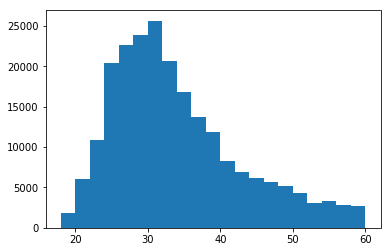

In [35]:
binsize = 2
bins = np.arange(18, df_clean['member_age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'member_age', bins = bins);

**Looks better now!**

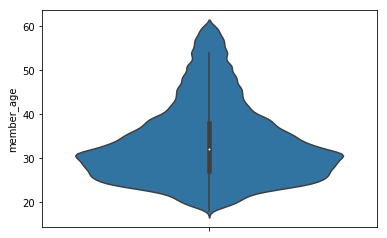

In [36]:
sb.violinplot(data = df_clean, y = 'member_age');

**The data is not distributed evenly. Many cyclists are older than 30 years old. Not many cyclists are over 40 years old.** 

In [28]:
# save cleaned data 
df_clean.to_csv('clean_master_file.csv', index=False)

In [37]:
default_color = sb.color_palette()[0]

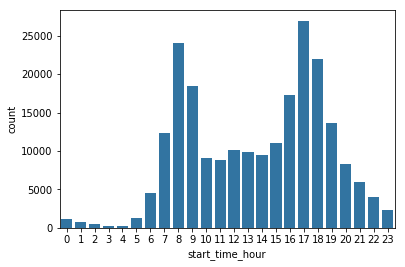

In [38]:
sb.countplot(data = df_clean, x = 'start_time_hour', color = default_color);

**8:00 AM and 5:00 PM are the two peak hours with the most cyclists.**

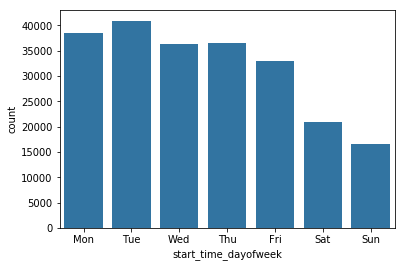

In [39]:
sb.countplot(data = df_clean, x = 'start_time_dayofweek', color = default_color);

**The day with the most cyclists is Tuesday.**

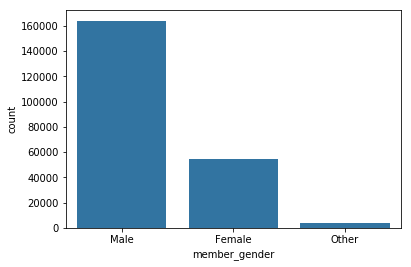

In [40]:
sb.countplot(data = df_clean, x = 'member_gender', color = default_color);

**There are about three times as many male cyclists as female cyclists.**

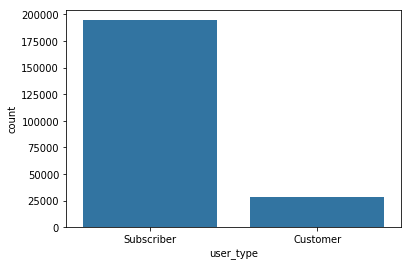

In [41]:
sb.countplot(data = df_clean, x = 'user_type', color = default_color);

**'Subscriber' user are more than 'Customer' user.** 

## Bivariate Exploration

In [42]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_min']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_time_dayofweek', 'start_time_hour', 'member_gender', 'user_type']

**Although we will not investigate all the numeric variables, let's still look at pairwise correlations which might present between numeric variables the data.**

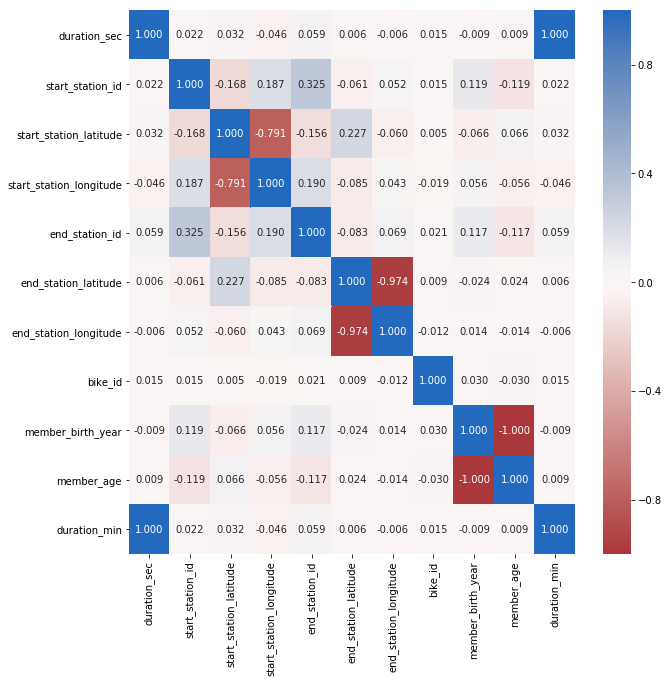

In [43]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(df_clean[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

**The correlation cofficients indicate there might be correlations between the following pairs of variables: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude). However, there are no strong evidences to support these. So these might happen just by accident.** 

---

**Next, let's look at the relationship between the numeric variables we are interested in: duration_min and member_age.**

C:\HUIYINGLU\Anaconda3\envs\DA_ND\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\HUIYINGLU\Anaconda3\envs\DA_ND\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\HUIYINGLU\Anaconda3\envs\DA_ND\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


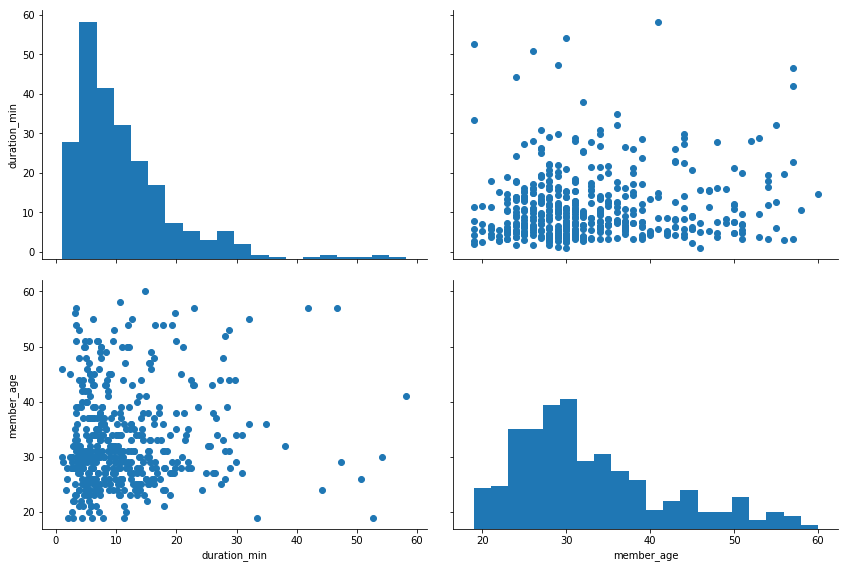

In [44]:
# plot matrix: sample 500 records so that plots are clearer and
# they render faster

samples = np.random.choice(df_clean.shape[0], 500, replace = False)
samp = df_clean.loc[samples,:]

g = sb.PairGrid(data = samp, vars = numeric_vars, height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

**There is no specific relationship (like linear) between duration_min and member_age. There is a dense area in the bottom left plot: around age 30, and around duration 10 minutes. As we saw eariler, the mean of member_age is around 32, and the mean of the duration is around 10, while peak is around 5.**

<Figure size 1080x1080 with 0 Axes>

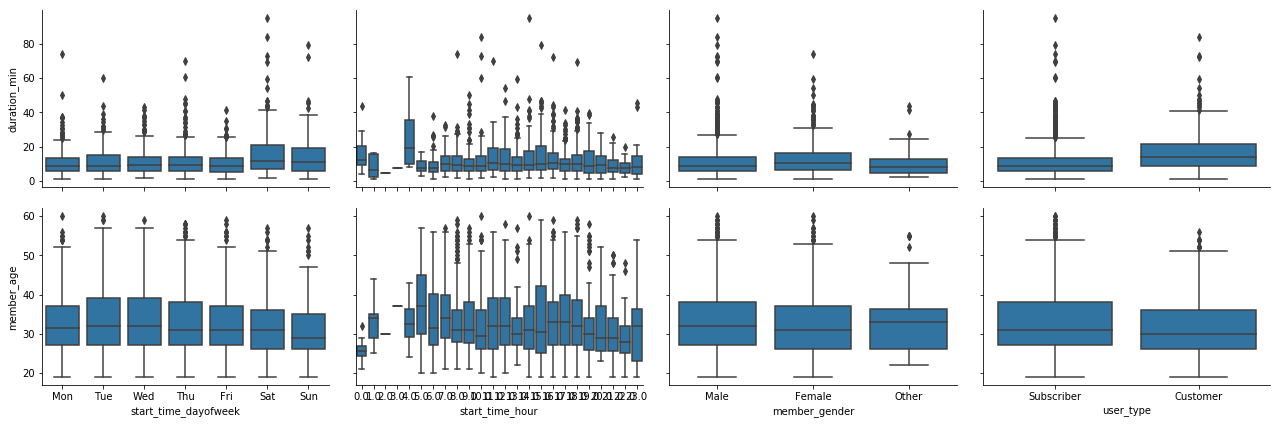

In [47]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_clean.shape[0], 2000, replace = False);
samp = df_clean.loc[samples, :];

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [15, 15]);
g = sb.PairGrid(data = samp, y_vars = ['duration_min', 'member_age'], x_vars = categoric_vars, height = 3, aspect = 1.5);
g.map(boxgrid);

**Observations from above plots:**
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> - Bike rides start between 5:00 AM to 6:00 PM have the longest mean durations compared to other time frames.
> - On average, female cyclists ride longer than male cyclists.
> - On average, cyclists who are not members (or suscribers) ride longer than cyclists who are subscribers.
> - The average age of cyclists on Tuesday and Wednesday is older than that of cyclists on other days. 
> - The average age of cyclists on Sunday is younger than that of cyclists on other days.
> - The average age of cyclists who start cycling between 6:00 AM to 7:00 AM is older than that of cyclists who start cycling at other time frames.
> - The average age of male cyclists is older than that of female cyclists.
> - The average age of cyclists who are subscribers is older than that of cyclists who are not subscribers.

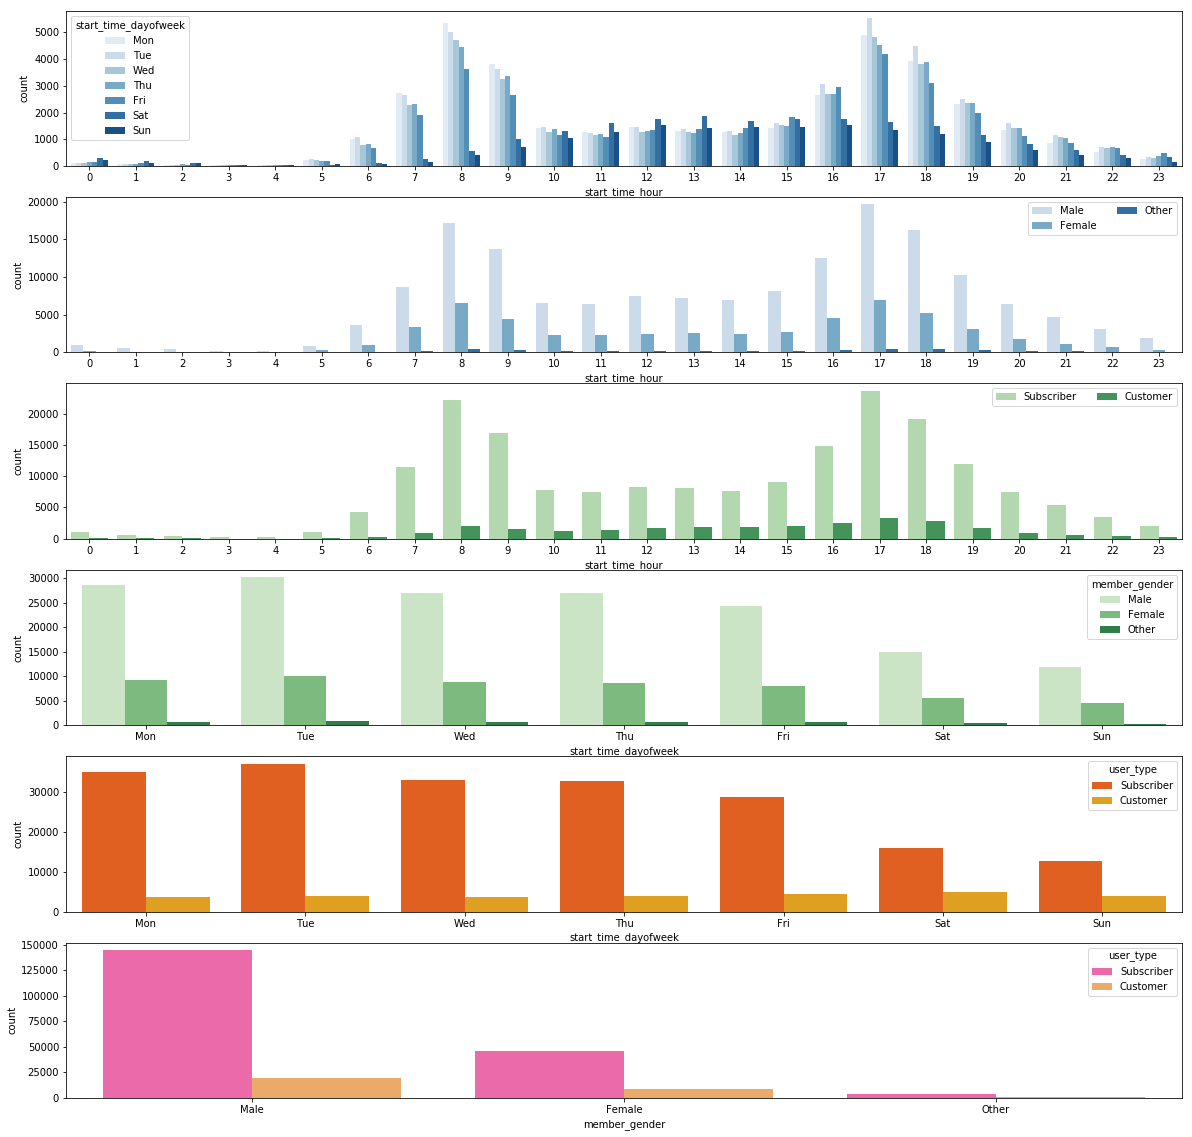

In [49]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');


ax = plt.subplot(6, 1, 2);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to avoid overlapping


ax = plt.subplot(6, 1, 3);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to avoid overlapping

ax = plt.subplot(6, 1, 4);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(6, 1, 5);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(6, 1, 6);

sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'spring');

**Observations from above plots:**
> - There are the most cyclists at 5 PM on Tuesday.
> - There are the most male cyclists at 5:00 PM. There are the most female cyclists at 8 AM and 5 PM.
> - There are the most subscriber type cyclists at 5 PM. There are the most non-subscriber type cyslists at 5 PM too.
> - There are the most male cyclists on Tuesday. There are the most female cyclists on Tuesday too.
> - There are the most subscriber type cyclists on Tuesday. There are the most customer type cyclists on Saturday.
> - Most subscriber type cyclists are male. Most non-subscriber type cyclists are male too.

---

**Let's make a plot with Log tranform on duration_min axis.**

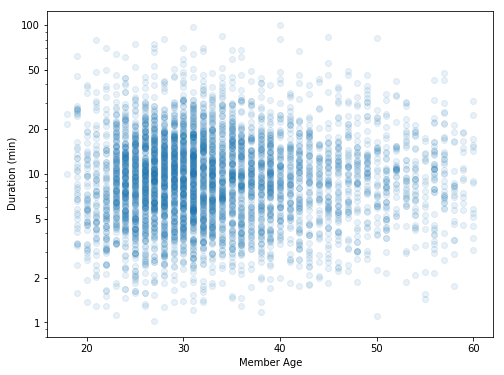

In [50]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
samples = np.random.choice(df_clean.shape[0], 5000, replace = False)
samp = df_clean.loc[samples,:]

plt.figure(figsize = [8, 6]);
plt.scatter(data = samp, x = 'member_age', y = 'duration_min', alpha = 1/10);
#plt.xlim([0, 3.5])
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

**Although we are still not seeing linear relationship between duration_min and member_age, the data looks distribute more even compared to the scatter plot drawn eariler.** 

In [51]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['log_duration_min'] = df_clean['duration_min'].apply(log_trans)

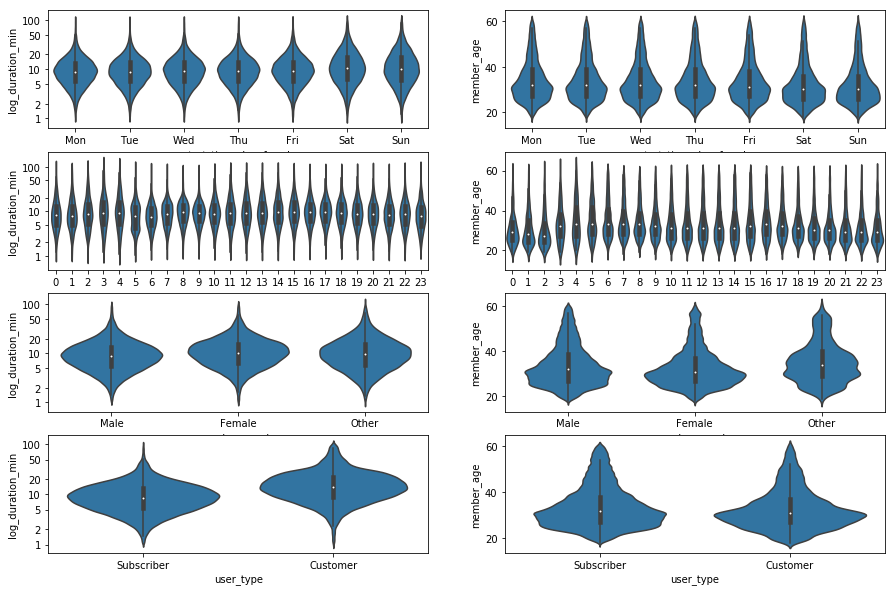

In [52]:
# plot the categorical variables against duration_min and member_age again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df_clean, x = var, y = 'log_duration_min', ax = ax[i,0], color = default_color);
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sb.violinplot(data = df_clean, x = var, y = 'member_age', ax = ax[i,1], color = default_color);

**Observations:**
> - The shapes of the violins in the plots on the left side (with 'log_duration_min' as y-axis) are more even compared to the shapes of the violins in the plots on the right side (with member_age as y-axis). The transformation make the violins on the left side looks more even.
> - Look at the plot on 1st row, 1st column: there are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
> - Look at the plot on 3rd row, 1st column: the mean bike duration for female cyclists is longer than the the mean duration of the male cyclists.
> - Look at the plot on 4th row, 1st column: the mean bike duration for customer type cyclists is longer than the the mean duration of the subscriber type cyclists.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> - Bike rides start between 5:00 AM to 6:00 PM have the longest mean durations compared to other time frames.
> - Female bikers bike longer on average compared to male bikers.
> - Bikers with user_type 'Customer' bikes longer on average compared to bikers with user_type 'Subscriber'.
> - There are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
> - The mean bike duration for female biker is longer than the the mean duration of the male bikers.
> - The mean bike duration for 'Customer' biker is longer than the the mean duration of the 'Subscriber' bikers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Observations from above plots:

> - The average age of cyclists on Tuesdays and Wednesdays are older than the average age of cyclists on other days.
> - The average age of cyclists on Sundays is younger than that of cyclists on other days.
> - The average age of cyclists who start cycling between 6:00 AM to 7:00 AM is older than the cyclists who start cycling at other time frames.
> - The average age of male cyclists is older than the average age of female cyclists.
> - The average age of subscriber type cyclists is older than the average age of the customer type cyclists.
> - There are the most cyclists on Tuesdays. There are the most cyclists at 5:00 PM.
> - There are the most male cyclists at 5:00 PM. There are the most female cyclists at 8 AM and 5 PM.
> - There are the most subscriber type cyclists at 5:00 PM. There are the most customer type cyclists at 5 PM too.
> - There are the most male cyclists on Tuesdays. There are the most female cyclists on Tuesdays too.
> - There are the most subscriber type cyclists on Tuesdays. There are most customer type cyclists on Saturdays.
> - Most suscriber type cyclists are male. Most customer type cyclists are male too.

## Multivariate Exploration

In [54]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(18, df_clean['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

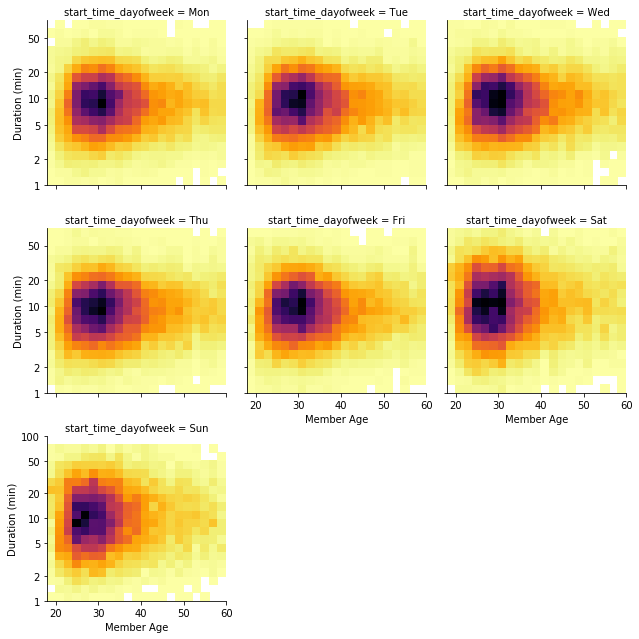

In [55]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_clean, col = 'start_time_dayofweek', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

**Observations:**
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.

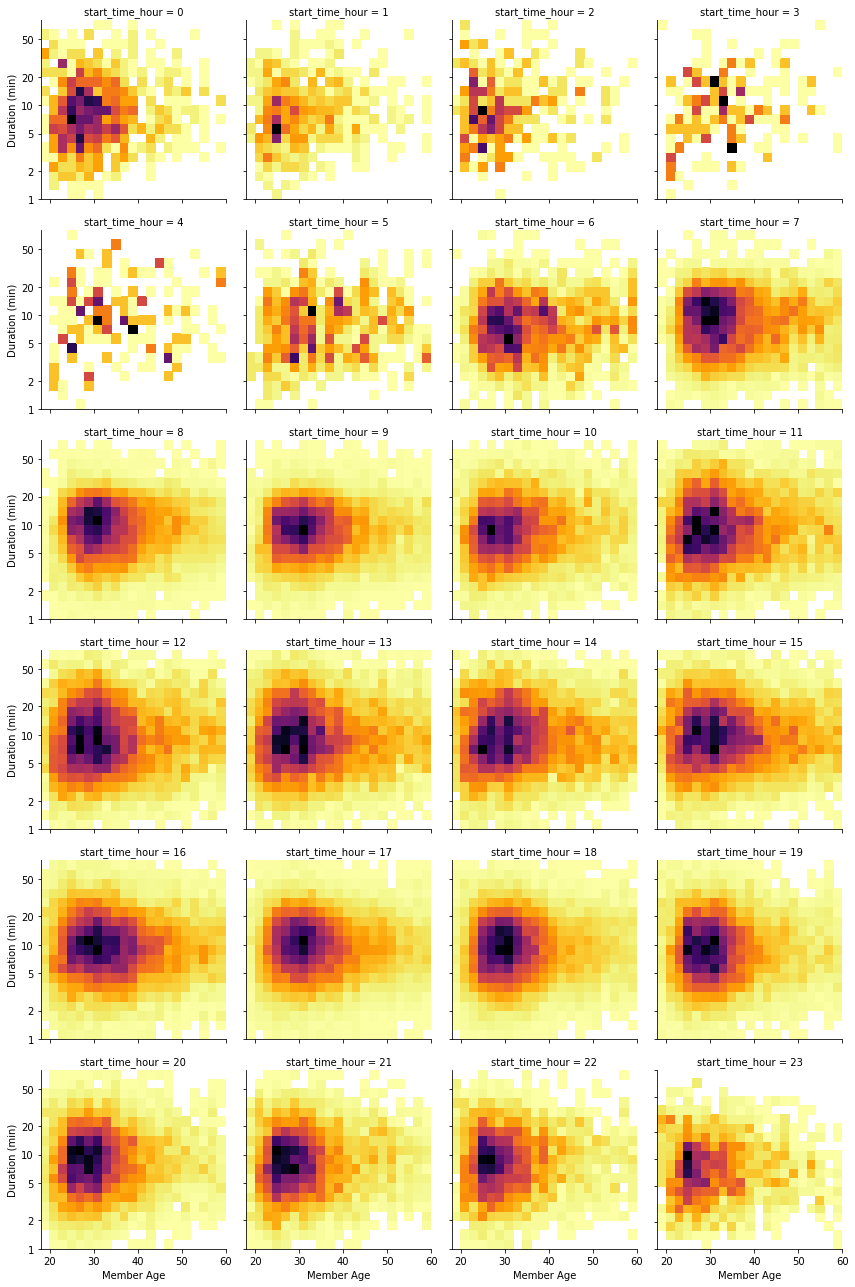

In [56]:
g = sb.FacetGrid(data = df_clean, col = 'start_time_hour', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

**Observations:**
> - There are the least cyclists at 4:00 AM while there are the most cyclists at 5:00 PM.

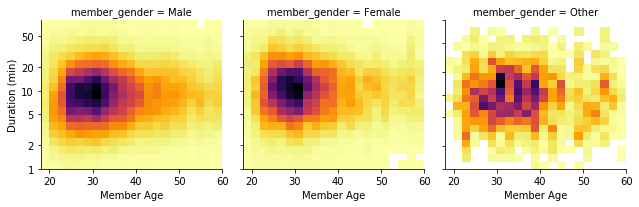

In [58]:
g = sb.FacetGrid(data = df_clean, col = 'member_gender', height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

**Observations:**
> - On average, female cyclists ride longer than male cyclists.

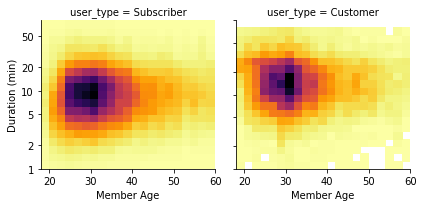

In [59]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

**Observations:**
> - On average, customer type cyclists ride longer than subscriber type cyclists.

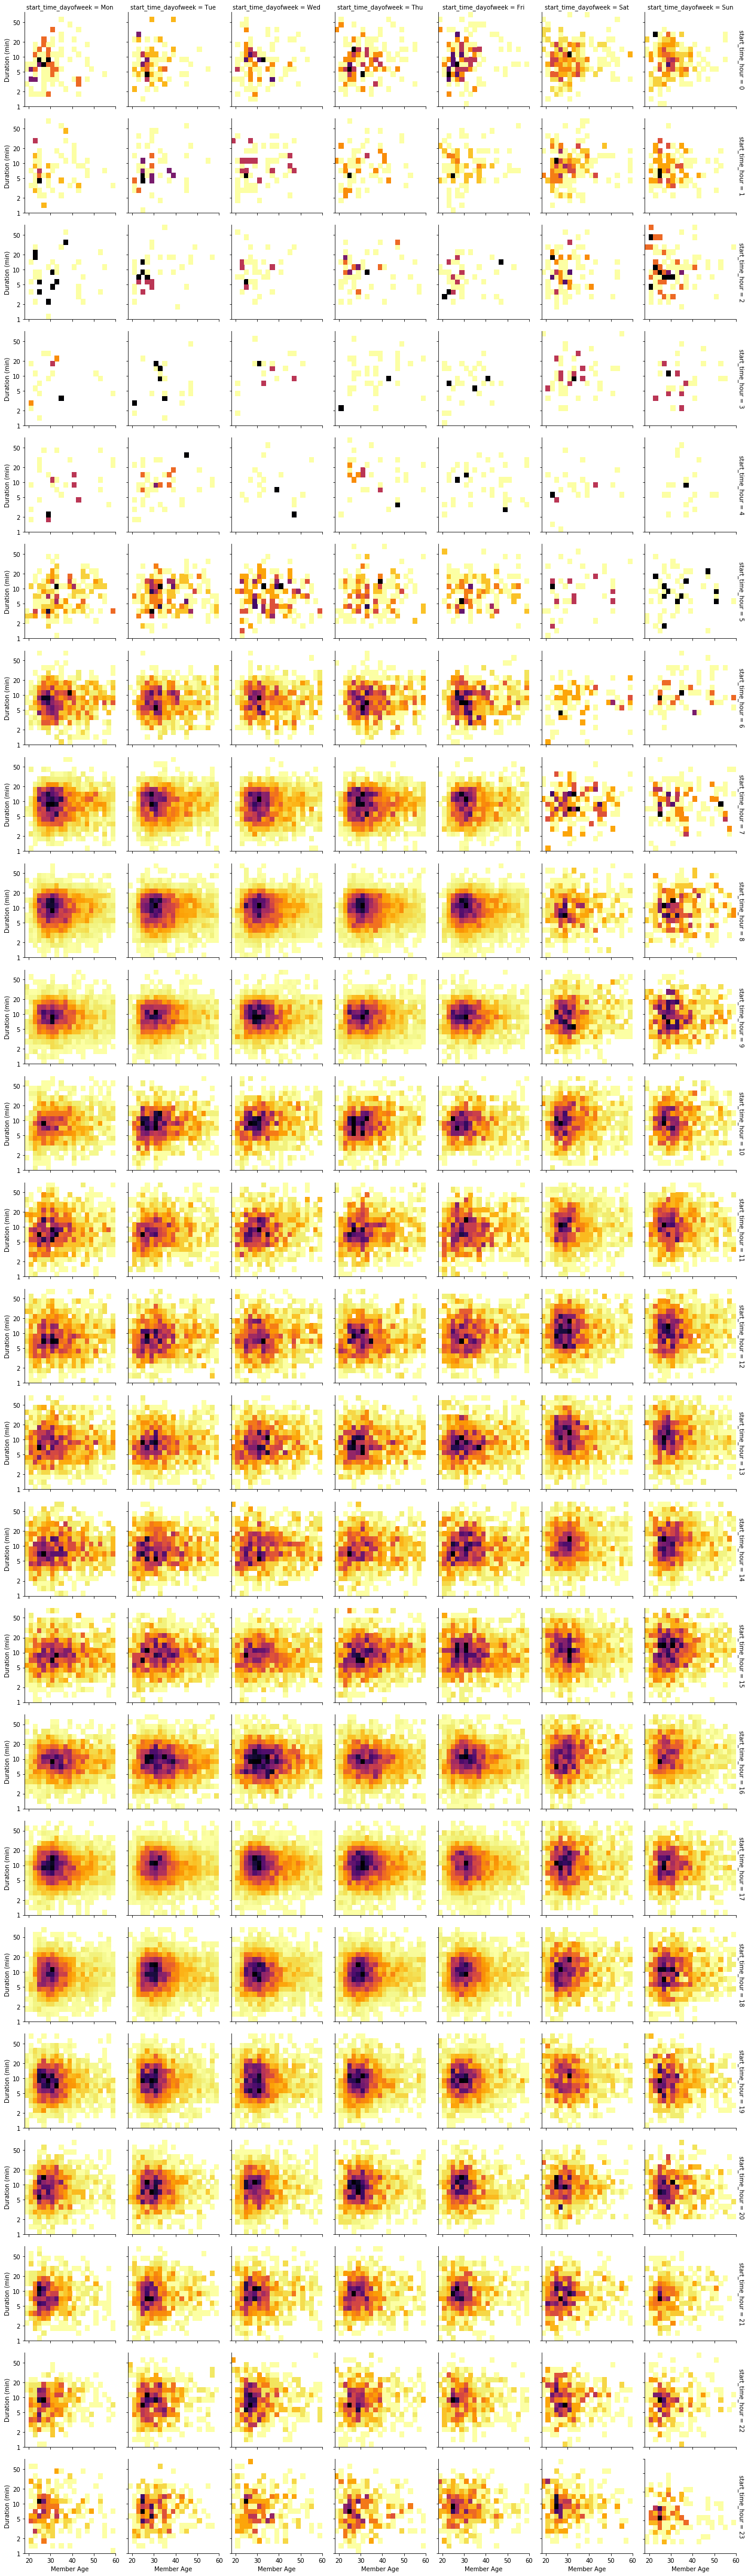

In [61]:
# create faceted heat maps on start_time_dayofweek and start_time_hour
g = sb.FacetGrid(data = df_clean, col = 'start_time_dayofweek', row = 'start_time_hour', height = 2.5, margin_titles = True);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

**Observations:**
> - There are the least cyclists at 3:00 AM and 4:00 AM.
> - On average, there are less cyclists on Saturdays and on Sundays.

**Let's devide bikers into 2 groups by age: one group has cyclists below 40 years old, another group has cyclists above 40 years old.**

In [62]:
age_flag1 = (df_clean['member_age'] < 40)
age_below_forty = df_clean.loc[age_flag1,:]

age_flag2 = (df_clean['member_age'] >= 40)
age_above_forty = df_clean.loc[age_flag2,:]

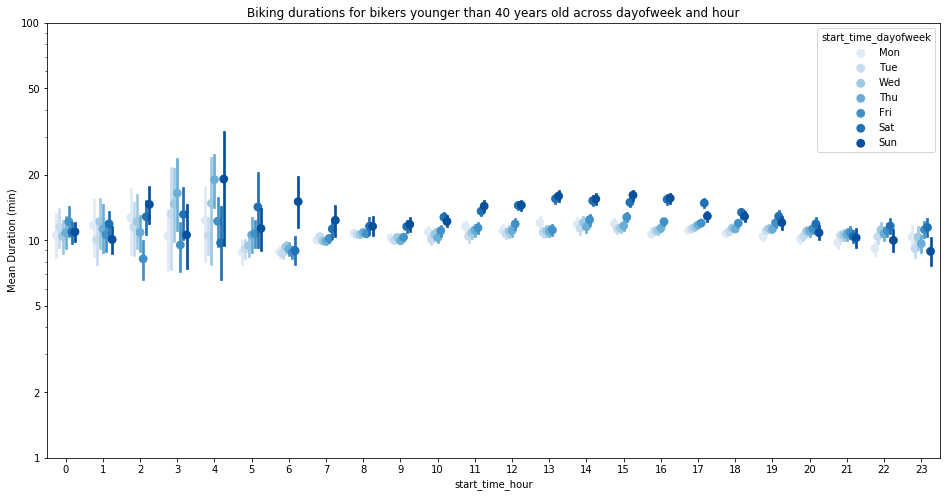

In [63]:
fig = plt.figure(figsize = [16,8])

ax = sb.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

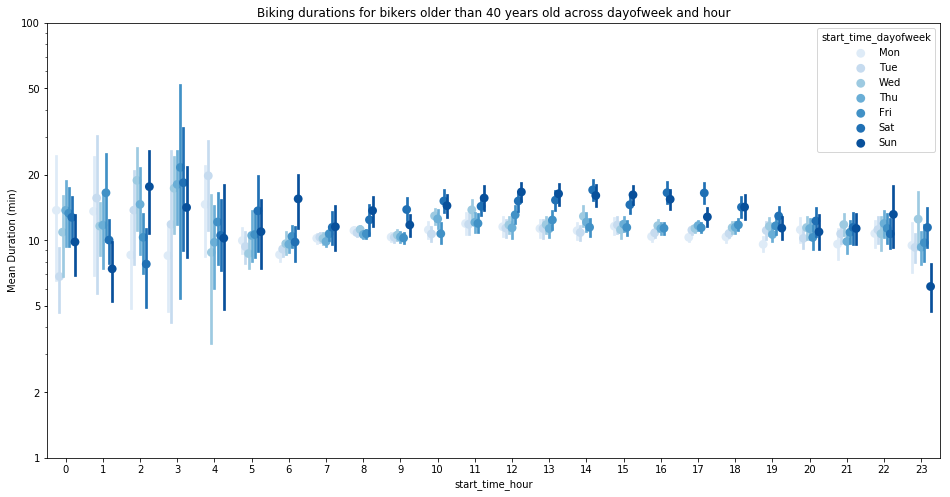

In [64]:
fig = plt.figure(figsize = [16,8])

ax = sb.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars in both pointplots, we can tell that there are more younger cyclists (age < 40) across 7 days and 24 hours.
> - Cyclists on Saturdays and Sundays ride longer than cyclists on other days.

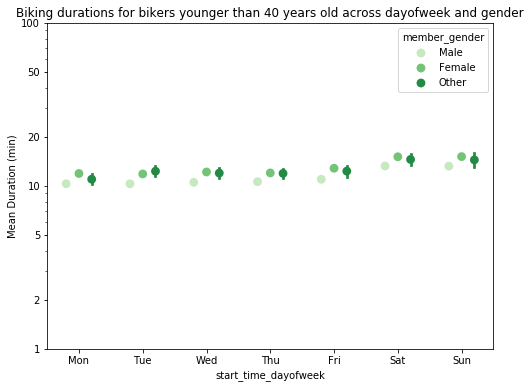

In [67]:
fig = plt.figure(figsize = [8,6]);

ax = sb.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

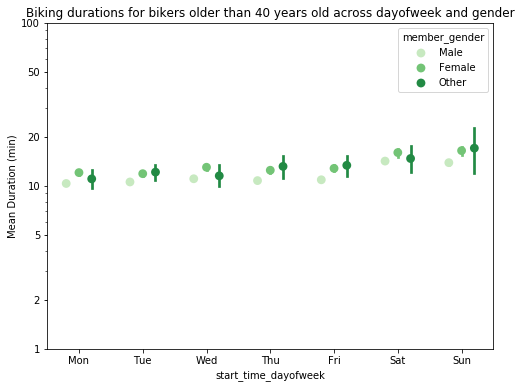

In [69]:
fig = plt.figure(figsize = [8,6]);

ax = sb.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars (first plot, other cyclists; second plot, female cyclists and other cyclists) in both pointplots, we can tell that there are less cyclists who are older than 40 years old.
> - Female cyclists ride longer than male cyclists.

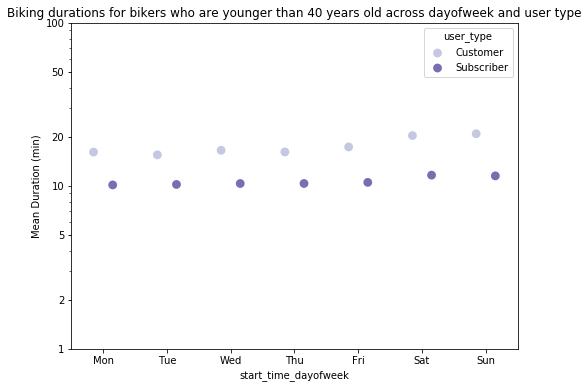

In [70]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are younger than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

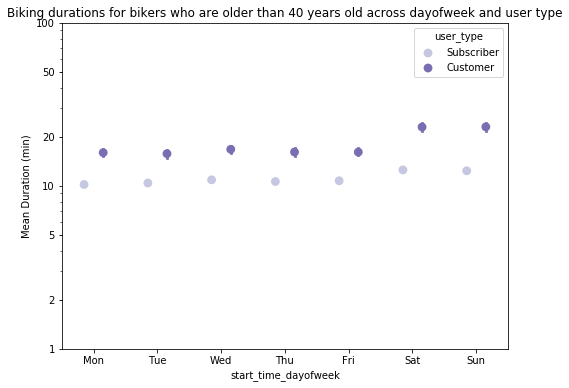

In [71]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are older than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars in both pointplots, we can tell that there are less cyclists who are older than 40 years old.
> - Customer type cyclists ride longer than subscriber type cyclists.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> - The features we investigated here are pretty much indenpendant from each other. We did not observed features that strengthened each other in terms of looking at features to my interest.

### Were there any interesting or surprising interactions between features?
> - Bike rides on Saturdays and Sundays have longer durations compared to bike rides on other weekdays.
> - There are the least cyclists at 4:00 AM while there are the most cyclists at 5:00 PM.
> - On average, female cyclists ride longer than male cyclists.
> - On average, customer type cyclists rike longer than subscriber type cyclists.
> - There are the least cyclists at 3:00 AM and 4:00 AM.
> - On average, there are the most cyclists on Saturdays and on Sundays.
> - There are more younger cyclists (age < 40) across 7 days and 24 hours.